In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
from lmfit.models import GaussianModel, VoigtModel, LinearModel, ConstantModel, QuadraticModel, LorentzianModel


In [2]:
# New things needed here
from scipy.interpolate import interp1d
from scipy.signal import find_peaks
import os
from os import listdir
from os.path import isfile, join



## Set path, and filetype

In [3]:
filetype='headless_txt'
path=r'G:\My Drive\Berkeley_NEW\DiadFit_outer\docs\Examples\Spectra\Skewness_tests'
Diad_files=pf.get_diad_files(path, file_ext='.txt')
Diad_files

exclude type
.png


['G170_004_1_4_0.5MW_1800G_45S_5ACC (CRR) (1).txt',
 'G170_004_1_4_0.5MW_1800G_45S_5ACC (CRR).txt',
 'G170_004_2_4_10MW_1800G_5S_1ACC (CRR).txt',
 'G170_004_2_4_10MW_1800G_5S_5ACC (CRR).txt',
 'G170_004_2_4_5MW_1800G_10S_1ACC (CRR).txt',
 'G170_004_2_4_5MW_1800G_10S_3ACC (CRR).txt']

## Tweak fit for 1 file before you loop

In [4]:
#filename=Diad_files[1]
path=r'G:\My Drive\Berkeley_NEW\DiadFit_outer\docs\Examples\Spectra\Skewness_tests'
filename='G170_004_2_4_5MW_1800G_10S_1ACC (CRR).txt'

int_cut_off=0.3 # Cut off intensity from peak to assess skewness
skewness='abs' # Calculates absolute skewness, e.g., biggest possible value

float64
float64


VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

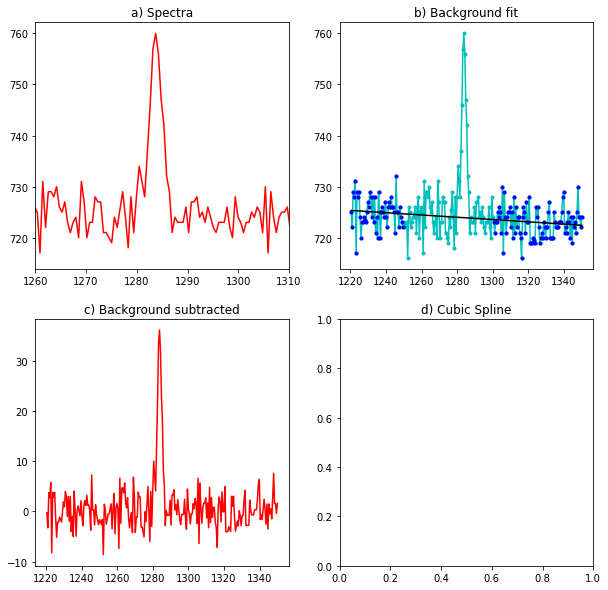

In [5]:
#import warnings
#warnings.filterwarnings('error')
 
AR_test_diad1=pf.assess_diad1_skewness(int_cut_off=int_cut_off, skewness=skewness,
                        path=path, filename=filename, filetype=filetype, 
                        exclude_range1=None, exclude_range2=None,
                        N_poly_bck_diad1=1, lower_baseline_diad1=[1220, 1250],
                        upper_baseline_diad1=[1300, 1350], save_fig=True, dpi=300)
AR_test_diad1

AR_test_diad2=pf.assess_diad2_skewness(int_cut_off=int_cut_off, skewness=skewness,path=path, filename=filename, filetype=filetype, 
                        exclude_range1=None, exclude_range2=None,
                        N_poly_bck_diad2=1, lower_baseline_diad2=[1300, 1360],
                        upper_baseline_diad2=[1440, 1470], save_fig=True,
                             dpi=200)
AR_test_diad2

## Now lets loop through all the files

exclude type
.png
working on file #0


C:\Users\penny\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
C:\Users\penny\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
C:\Users\penny\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do thi

AttributeError: 'DataFrame' object has no attribute 'concat'

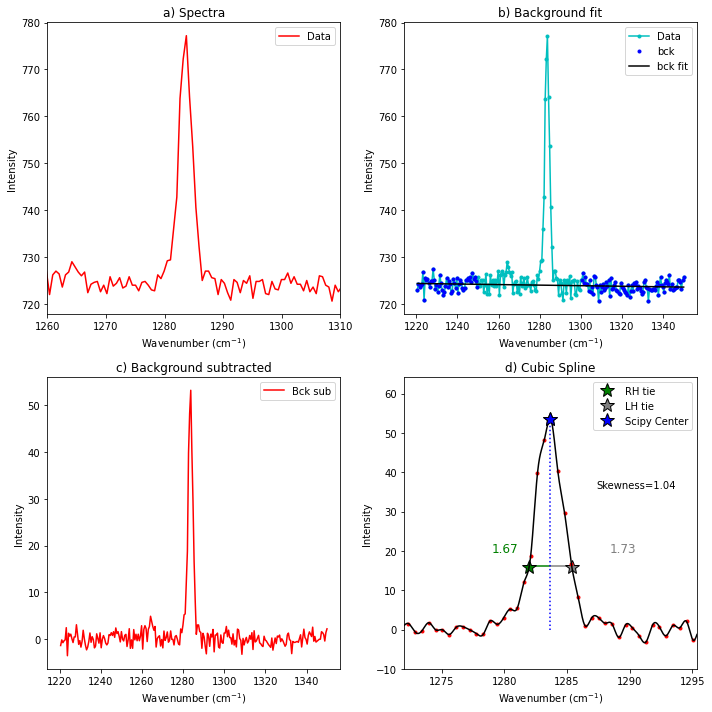

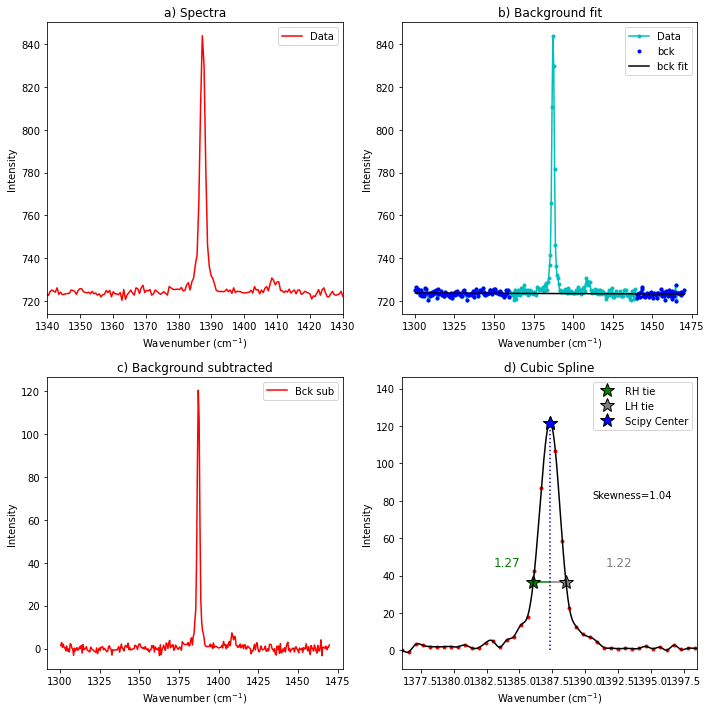

In [6]:
df=pf.loop_diad_skewness(path=path, skewness=skewness, filetype=filetype,
file_ext='.txt',
int_cut_off=0.3, N_poly_bck_diad1=1, exclude_range1_diad1=None,
exclude_range2_diad1=None, lower_baseline_diad1=[1220, 1250],
upper_baseline_diad1=[1300, 1350],
N_poly_bck_diad2=1,  exclude_range1_diad2=None, 
exclude_range2_diad2=None, lower_baseline_diad2=[1300, 1360],
upper_baseline_diad2=[1440, 1470], save_fig=True, dpi=300)

## Diad 1 function

In [4]:
def assess_diad1_skewness(*,  cut_off=0.3, ascalc='dir',path=None, filename=None, filetype=None, 
                        exclude_range1=None, exclude_range2=None,
                        N_poly_bck_diad1=1, lower_baseline_diad1=[1220, 1250],
                        upper_baseline_diad1=[1300, 1350], save_fig=True, dpi=300):
    
# First, do the background subtraction
    y_corr_diad1, Py_base_diad1, x_diad1,  Diad_short, Py_base_diad1, Pf_baseline,  Baseline_ysub_diad1, Baseline_x_diad1, Baseline, span=pf.remove_diad_baseline(
    path=path, filename=filename, filetype=filetype, exclude_range1=exclude_range1, exclude_range2=exclude_range2, N_poly=N_poly_bck_diad1,
    lower_range=lower_baseline_diad1, upper_range=upper_baseline_diad1, plot_figure=False)
    


    x_lin_baseline=np.linspace(lower_baseline_diad1[0], upper_baseline_diad1[1], 2000)
    ybase_xlin=Pf_baseline(x_lin_baseline)


    
# Get x and y for cubic spline
    x=x_diad1
    y=y_corr_diad1

# Fits a  cubic spline
    f2 = interp1d(x, y, kind='cubic')
    x_new=np.linspace(np.min(x), np.max(x), 5000)

    y_cub=f2(x_new)



# Use Scipy find peaks to get that cubic peak
    height=1
    peaks = find_peaks(y_cub, height)
    peak_height=peaks[1]['peak_heights']
    peak_pos = x_new[peaks[0]]

    # find max peak.  put into df because i'm lazy
    peak_df=pd.DataFrame(data={'pos': peak_pos,
                        'height': peak_height})
    #print(peak_df)
    # Find bigest peaks,
    df_peak_sort=peak_df.sort_values('height', axis=0, ascending=False)
    df_peak_sort_trim=df_peak_sort[0:1]
    Peak_Center=df_peak_sort_trim['pos']
    Peak_Height=df_peak_sort_trim['height']
    

# Find intensity cut off
    y_int_15=Peak_Height*cut_off

    # Split the array into a LHS and a RHS
    LHS_y=y_cub[x_new<=Peak_Center.values]
    RHS_y=y_cub[x_new>Peak_Center.values]
    
    LHS_x=x_new[x_new<=Peak_Center.values]
    RHS_x=x_new[x_new>Peak_Center.values]
    
    # Need to flip LHS to put into the find closest function
    LHS_y_flip=np.flip(LHS_y)
    LHS_x_flip=np.flip(LHS_x)
    #plt.plot(LHS_x, LHS_y)
    val=np.argmax(LHS_y_flip<y_int_15.values)
    #plt.plot(LHS_x_flip[val], LHS_y_flip[val], '*k')
    
    #plt.plot(RHS_x, RHS_y)
    val2=np.argmax(RHS_y<y_int_15.values)
    #plt.plot(RHS_x[val2], RHS_y[val2], '*k')

    # Find nearest x unit to this value


    y_nearest_LHS=LHS_y_flip[val]
    x_nearest_LHS=LHS_x_flip[val]

    y_nearest_RHS=RHS_y[val2]
    x_nearest_RHS=RHS_x[val2]
    

    # Return Skewness
    LHS_Center=abs(x_nearest_LHS-Peak_Center)
    RHS_Center=abs(x_nearest_RHS-Peak_Center)
    #print(LHS_Center.values)
    #print(RHS_Center.values)
   #Added this conditional to always have a ratio of the high/low
    if ascalc=='abs':
        if LHS_Center.values>RHS_Center.values:
            AS=LHS_Center.values/RHS_Center.values
        else:
            AS=RHS_Center.values/LHS_Center.values
    elif ascalc=='dir':
        AS=RHS_Center.values/LHS_Center.values
    #print(AS)
    
    if save_fig is True:
        
        # Make pretty figure showing background subtractoin routine
        fig, ((ax2, ax1), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))

        ax2.set_title('a) Spectra')
        ax2.plot(Diad_short[:, 0], Diad_short[:, 1], '-r', label='Data')
        ax2.set_xlim([lower_baseline_diad1[0]+40, upper_baseline_diad1[1]-40])
        ax1.set_title('b) Background fit')
        ax1.plot(Diad_short[:, 0], Diad_short[:, 1], '.-c', label='Data')

        ax1.plot(Baseline[:, 0], Baseline[:, 1], '.b', label='bck')
        ax1.plot(Diad_short[:, 0], Py_base_diad1, '-k', label='bck fit')
        ax3.set_title('c) Background subtracted')
        ax3.plot( x_diad1,y_corr_diad1, '-r', label='Bck sub')

    # Adds cubic interpoloation for inspection
    # Cubic seems way better...
        ax4.set_title('d) Cubic Spline')
        ax4.plot(x, y, '.r')
        ax4.plot(x_new, y_cub, '-k')

        ax4.plot([Peak_Center, Peak_Center], [Peak_Height, Peak_Height], 
             '*k', mfc='blue', ms=15, label='Scipy Center')


        # Add to plot
        ax4.plot([1276, 1290], [y_int_15, y_int_15], ':r')
        ax4.plot(x_nearest_RHS, y_nearest_RHS, '*k', mfc='yellow', ms=15, label='LH tie')
        ax4.plot(x_nearest_LHS, y_nearest_LHS, '*k', mfc='yellow',ms=15, label='RH tie')


        ax4.set_xlim([x_nearest_LHS-10, x_nearest_RHS+10])
        ax4.set_ylim([0-10, Peak_Height.values*1.2])
        ax4.plot([Peak_Center, Peak_Center], [0, Peak_Height], ':b')
        ax4.annotate(str(np.round(LHS_Center.values[0], 2)), 
                     xy=(x_nearest_LHS-3, y_int_15-(Peak_Height-y_int_15)/10), xycoords="data", 
                     fontsize=10)
        ax4.annotate(str(np.round(RHS_Center.values[0], 2)), 
                     xy=(x_nearest_RHS+3, y_int_15-(Peak_Height-y_int_15)/10), xycoords="data", 
                      fontsize=10)
        ax2.legend()
        ax1.legend()
        ax3.legend()
        ax4.legend()    
        ax1.set_xlabel('Wavenumber (cm$^{-1}$)')
        ax2.set_xlabel('Wavenumber (cm$^{-1}$)')
        ax3.set_xlabel('Wavenumber (cm$^{-1}$)')
        ax4.set_xlabel('Wavenumber (cm$^{-1}$)')
        ax1.set_ylabel('Intensity')
        ax2.set_ylabel('Intensity')
        ax3.set_ylabel('Intensity')
        ax4.set_ylabel('Intensity')
        fig.tight_layout()
        
        
        path3=path+'/'+'Skewness_images'
        if os.path.exists(path3):
            out='path exists'
        else:
            os.makedirs(path+'/'+ 'Skewness_images', exist_ok=False)


        file=filename.rsplit('.txt', 1)[0]
        fig.savefig(path3+'/'+'Diad1_skewness_{}.png'.format(file), dpi=dpi)
        
    df_out=pd.DataFrame(data={'filename':filename,
                              'Skewness_diad1': AS,
                              'LHS_tie_diad1': x_nearest_LHS,
                              'RHS_tie_diad1': x_nearest_RHS})
 
    return df_out#, x_new, y_cub, LHS_y, RHS_y, LHS_x, RHS_x




## Diad 2 function

In [5]:
## DIAD 2
def assess_diad2_skewness(*,  cut_off=0.3, ascalc='dir',path=None, filename=None, filetype=None, 
                        exclude_range1=None, exclude_range2=None,
                        N_poly_bck_diad2=1, lower_baseline_diad2=[1300, 1360],
                        upper_baseline_diad2=[1440, 1470], save_fig=True, dpi=300):
    
# First, do the background subtraction
    y_corr_diad2, Py_base_diad2, x_diad2,  Diad_short, Py_base_diad2, Pf_baseline,  Baseline_ysub_diad2, Baseline_x_diad2, Baseline, span=pf.remove_diad_baseline(
    path=path, filename=filename, filetype=filetype, exclude_range1=exclude_range1, exclude_range2=exclude_range2, N_poly=N_poly_bck_diad2,
    lower_range=lower_baseline_diad2, upper_range=upper_baseline_diad2, plot_figure=False)
    


    x_lin_baseline=np.linspace(lower_baseline_diad2[0], upper_baseline_diad2[1], 2000)
    ybase_xlin=Pf_baseline(x_lin_baseline)


    
# Get x and y for cubic spline
    x=x_diad2
    y=y_corr_diad2

# Fits a  cubic spline
    f2 = interp1d(x, y, kind='cubic')
    x_new=np.linspace(np.min(x), np.max(x), 5000)

    y_cub=f2(x_new)



# Use Scipy find peaks to get that cubic peak
    height=1
    peaks = find_peaks(y_cub, height)
    peak_height=peaks[1]['peak_heights']
    peak_pos = x_new[peaks[0]]

    # find max peak.  put into df because i'm lazy
    peak_df=pd.DataFrame(data={'pos': peak_pos,
                        'height': peak_height})
    #print(peak_df)
    # Find bigest peaks,
    df_peak_sort=peak_df.sort_values('height', axis=0, ascending=False)
    df_peak_sort_trim=df_peak_sort[0:1]
    Peak_Center=df_peak_sort_trim['pos']
    Peak_Height=df_peak_sort_trim['height']
    
# # Inspect center


    
# Find intensity cut off
    y_int_15=Peak_Height*cut_off

    # Split the array into a LHS and a RHS
    LHS_y=y_cub[x_new<=Peak_Center.values]
    RHS_y=y_cub[x_new>Peak_Center.values]
    
    LHS_x=x_new[x_new<=Peak_Center.values]
    RHS_x=x_new[x_new>Peak_Center.values]
    
    # Need to flip LHS to put into the find closest function
    LHS_y_flip=np.flip(LHS_y)
    LHS_x_flip=np.flip(LHS_x)
    #plt.plot(LHS_x, LHS_y)
    val=np.argmax(LHS_y_flip<y_int_15.values)
    #plt.plot(LHS_x_flip[val], LHS_y_flip[val], '*k')
    
    ##plt.plot(RHS_x, RHS_y)
    val2=np.argmax(RHS_y<y_int_15.values)
    #plt.plot(RHS_x[val2], RHS_y[val2], '*k')

    # Find nearest x unit to this value


    y_nearest_LHS=LHS_y_flip[val]
    x_nearest_LHS=LHS_x_flip[val]

    y_nearest_RHS=RHS_y[val2]
    x_nearest_RHS=RHS_x[val2]

    # Return Skewness
    LHS_Center=abs(x_nearest_LHS-Peak_Center)
    RHS_Center=abs(x_nearest_RHS-Peak_Center)
    # print(LHS_Center)
    # print(RHS_Center)
    #Added this conditional to always have a ratio of the high/low
    if ascalc=='abs':
        if LHS_Center.values>RHS_Center.values:
            AS=LHS_Center.values/RHS_Center.values
        else:
            AS=RHS_Center.values/LHS_Center.values
    elif ascalc=='dir':
        AS=RHS_Center.values/LHS_Center.values
    #print(AS)

    if save_fig is True:
        
        # Make pretty figure showing background subtractoin routine
        fig, ((ax2, ax1), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))

        ax2.set_title('a) Spectra')
        ax2.plot(Diad_short[:, 0], Diad_short[:, 1], '-r', label='Data')
        ax2.set_xlim([lower_baseline_diad2[0]+40, upper_baseline_diad2[1]-40])
        ax1.set_title('b) Background fit')
        ax1.plot(Diad_short[:, 0], Diad_short[:, 1], '.-c', label='Data')

        ax1.plot(Baseline[:, 0], Baseline[:, 1], '.b', label='bck')
        ax1.plot(Diad_short[:, 0], Py_base_diad2, '-k', label='bck fit')
        ax3.set_title('c) Background subtracted')
        ax3.plot( x_diad2,y_corr_diad2, '-r', label='Bck sub')

    # Adds cubic interpoloation for inspection
    # Cubic seems way better...
        ax4.set_title('d) Cubic Spline')
        ax4.plot([np.min(x), np.max(x)], [y_int_15, y_int_15], ':r')
        ax4.plot(x, y, '.r')
        ax4.plot(x_new, y_cub, '-k')

        ax4.plot([Peak_Center, Peak_Center], [Peak_Height, Peak_Height], 
             '*k', mfc='blue', ms=15, label='Scipy Center')


        # Add to plot
        
        ax4.plot(lower_baseline_diad2[0], upper_baseline_diad2[1], [y_int_15, y_int_15], ':r')
        ax4.plot(x_nearest_RHS, y_nearest_RHS, '*k', mfc='yellow', ms=15, label='LH tie')
        ax4.plot(x_nearest_LHS, y_nearest_LHS, '*k', mfc='yellow',ms=15, label='RH tie')


        ax4.set_xlim([x_nearest_LHS-10, x_nearest_RHS+10])
        ax4.set_ylim([0-10, Peak_Height.values*1.2])
        ax4.plot([Peak_Center, Peak_Center], [0, Peak_Height], ':b')
        ax4.annotate(str(np.round(LHS_Center.values[0], 2)), 
                     xy=(x_nearest_LHS-3, y_int_15-(Peak_Height-y_int_15)/10), xycoords="data", 
                     fontsize=10)
        ax4.annotate(str(np.round(RHS_Center.values[0], 2)), 
                     xy=(x_nearest_RHS+3, y_int_15-(Peak_Height-y_int_15)/10), xycoords="data", 
                      fontsize=10)
        ax2.legend()
        ax1.legend()
        ax3.legend()
        ax4.legend()    
        ax1.set_xlabel('Wavenumber (cm$^{-1}$)')
        ax2.set_xlabel('Wavenumber (cm$^{-1}$)')
        ax3.set_xlabel('Wavenumber (cm$^{-1}$)')
        ax4.set_xlabel('Wavenumber (cm$^{-1}$)')
        ax1.set_ylabel('Intensity')
        ax2.set_ylabel('Intensity')
        ax3.set_ylabel('Intensity')
        ax4.set_ylabel('Intensity')
        fig.tight_layout()
        
        
        path3=path+'/'+'Skewness_images'
        if os.path.exists(path3):
            out='path exists'
        else:
            os.makedirs(path+'/'+ 'Skewness_images', exist_ok=False)


        file=filename.rsplit('.txt', 1)[0]
        fig.savefig(path3+'/'+'Diad2_skewness_{}.png'.format(file), dpi=dpi)
        

    df_out=pd.DataFrame(data={'filename_diad2':filename,
                              'Skewness_diad2': AS,
                              'LHS_tie_diad2': x_nearest_LHS,
                              'RHS_tie_diad2': x_nearest_RHS})
 
    return df_out

In [8]:
filetype='headless_txt'
path=r'G:\My Drive\Berkeley_NEW\DiadFit_outer\docs\Examples\Spectra\Skewness_tests'
Diad_files=pf.get_diad_files(path, file_ext='.txt')
# Select cut off - e.g 30% of peak
cut_off=0.25
ascalc='dir' #'abs' for absolute skew, default 'dir' for directional skew
Diad_files


['G170_004_2_4_10MW_1800G_5S_1ACC (CRR).txt',
 'G170_004_2_4_10MW_1800G_5S_5ACC (CRR).txt',
 'G170_004_2_4_5MW_1800G_10S_1ACC (CRR).txt',
 'G170_004_2_4_5MW_1800G_10S_3ACC (CRR).txt']

# Do 1 example fit to check you are happy with each diad

In [11]:
#filename=Diad_files[1]
filename='G170_004_2_4_5MW_1800G_10S_1ACC (CRR).txt'

C:\Users\penny\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


,filename,Skewness_diad1,LHS_tie_diad1,RHS_tie_diad1
0,G170_004_2_4_5MW_1800G_10S_1ACC (CRR).txt,1.25,1281.887615,1285.848605


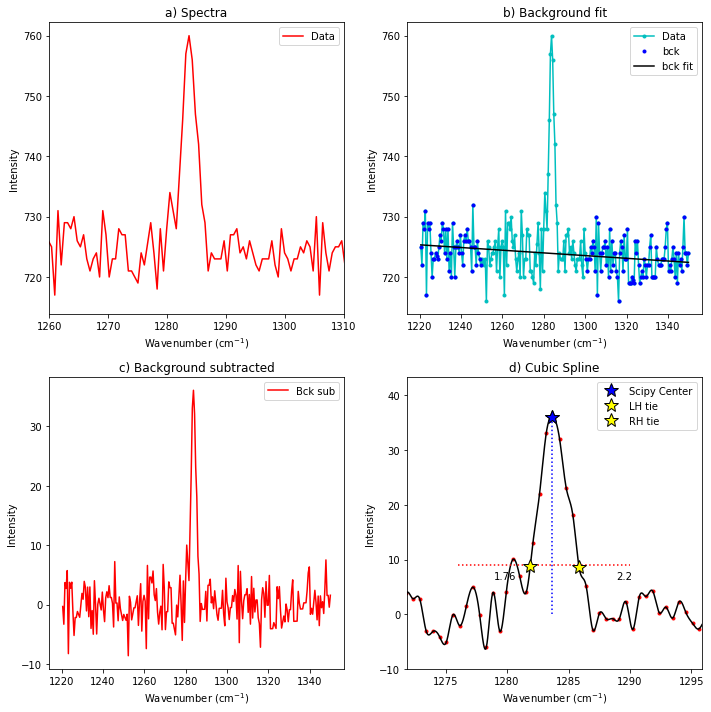

C:\Users\penny\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


,filename_diad2,Skewness_diad2,LHS_tie_diad2,RHS_tie_diad2
0,G170_004_2_4_5MW_1800G_10S_1ACC (CRR).txt,0.698113,1385.831607,1388.88068


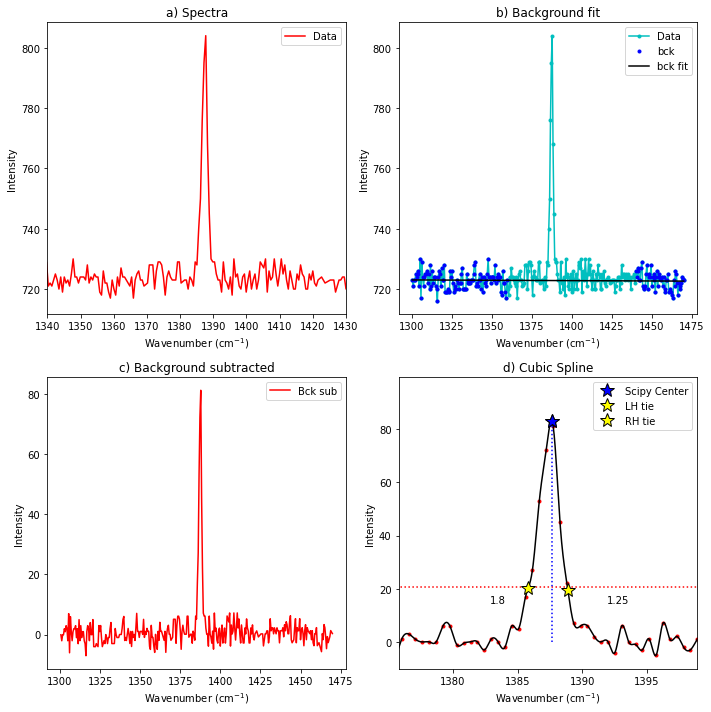

## Now Loop
- Can save figures to a folder, takes longer but means could inspect manually

In [14]:
type(Diad_files)

list

In [274]:
save_fig=False # Means doesnt make figures, lot faster. 


df_diad1 = pd.DataFrame([])
df_diad2 = pd.DataFrame([])
for i in range(0, len(Diad_files)):
    
    filename=Diad_files[i]
    print('working on file #'+str(i))
    
    data_diad1=assess_diad1_skewness(int_cut_off=int_cut_off, 
                        skewness=skewness, path=path, filename=filename, 
                        filetype=filetype, 
                        exclude_range1=exclude_range1_diad1, 
                        exclude_range2=exclude_range2_diad1,
                        N_poly_bck_diad1=N_poly_bck_diad1,
                        lower_baseline_diad1=lower_baseline_diad1,
                        upper_baseline_diad1=upper_baseline_diad1, 
                        save_fig=save_fig,
                        dpi=dpi)
    
    data_diad2=assess_diad2_skewness(int_cut_off=int_cut_off, 
                        skewness=skewness, path=path, filename=filename, 
                        filetype=filetype, 
                        exclude_range1=exclude_range1_diad2, 
                        exclude_range2=exclude_range2_diad2,
                        N_poly_bck_diad2=N_poly_bck_diad2,
                        lower_baseline_diad2=lower_baseline_diad2,
                        upper_baseline_diad2=upper_baseline_diad2, 
                        save_fig=save_fig,
                        dpi=dpi)

    df_diad1 = df_diad1.append(data_diad1)
    df_diad2 = df_diad2.append(data_diad2)
    



working on file #0
2.221213549123087
2.0912024756187546
working on file #1
1.6345571438092563
1.5794412588041538
working on file #2
1.4651977665486793
1.7098474262995191
working on file #3
15.298948191628009
27.344580467870493
working on file #4
1.6708457966673322
1.9053041520698446
working on file #5
10.368557263513425
10.663953064532219
working on file #6
4.658103491291879
8.822100661322553
working on file #7
2.552412318679381
2.839012926697456
working on file #8
2.7990118113686844
2.444213181168405
working on file #9
2.5192626405224336
2.6428482544628022
working on file #10
3.364366813710722
3.2527486762362856
working on file #11
1.0491374319624458
1.16263871465087
working on file #12
2.971847743173822
5.73185274584203
working on file #13
1.4076512321211274
1.5244001774689315
working on file #14
3.1162311890606156
7.752119058958483
working on file #15
1.6679783652476126
1.9429653629733343
working on file #16
1.4998537004596857
1.6706240763607922
working on file #17
1.839181711501276

In [275]:
df_combo=pd.concat([df_diad1.reset_index(drop=True),
                    df_diad2.reset_index(drop=True)],
                   axis=1)
df_combo
df_combo.to_excel('Skewness.xlsx')
df_combo.to_clipboard(excel=True)

R2=0.73


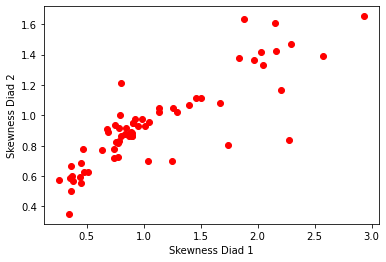

In [276]:
import Thermobar as pt
plt.plot(df_combo['Skewness_diad1'],
         df_combo['Skewness_diad2'],
         'or')
plt.xlabel('Skewness Diad 1')
plt.ylabel('Skewness Diad 2')

Stats=pt.calculate_R2(df_combo['Skewness_diad1'],
         df_combo['Skewness_diad2'])
print("R2="+str(Stats['R2']))